# Coding for CSEN 5303 Programming Assignment #1


# Importing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Data Preparation
- Loading the Dataset:
  - Load the dataset using pandas.
  - Check for missing values and handle them if necessary (e.g., imputation, removal).
  - Feature scaling (e.g., Min-Max scaling or Standard scaling) if required.
  - Encoding categorical variables if present (though the dataset seems to have numerical features only).

## Load the Dataset

In [2]:
import pandas as pd

# Path to the dataset
file_path = '/content/uci_malware_detection.csv'

# Load the dataset into a pandas DataFrame
malware_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(malware_data.head())

# Display basic information about the dataset
print(malware_data.info())


           Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  \
0  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
1  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
2  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
3  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
4  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   

   F_523  F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dt

# Checking for the Null Values

In [3]:
# Check for missing values
missing_values = malware_data.isnull().sum()

# Display columns with missing values
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


# Handling missing values


In [4]:
# Remove rows with missing values
malware_data_dropped = malware_data.dropna()

# Display information after handling missing values
print("\nDataFrame after removing rows with missing values:")
print(malware_data_dropped.info())


DataFrame after removing rows with missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dtypes: int64(531), object(1)
memory usage: 1.5+ MB
None


# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = malware_data.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    malware_data[col] = le.fit_transform(malware_data[col])
    label_encoders[col] = le  # Save the encoder for future use (if needed)

# Display the first few rows after label encoding
print("\nFirst few rows after label encoding:")
print(malware_data.head())

# Display the final DataFrame information
print("\nFinal DataFrame information:")
print(malware_data.info())


First few rows after label encoding:
   Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  F_523  \
0      1    1    0    1    0    1    0    1    0    1  ...      0      0   
1      1    1    0    1    0    1    0    1    0    1  ...      0      0   
2      1    1    0    1    0    1    0    1    0    1  ...      0      0   
3      1    1    0    1    0    1    0    1    0    1  ...      0      0   
4      1    1    0    1    0    1    0    1    0    1  ...      0      0   

   F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]

Final DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entrie

# 2. Data Augmentation/Synthetic Data Generation
- Addressing Class Imbalance:
  - Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.


# Check for Class Distribution


Distribution of classes in the Label column:
Label
0    301
1     72
Name: count, dtype: int64


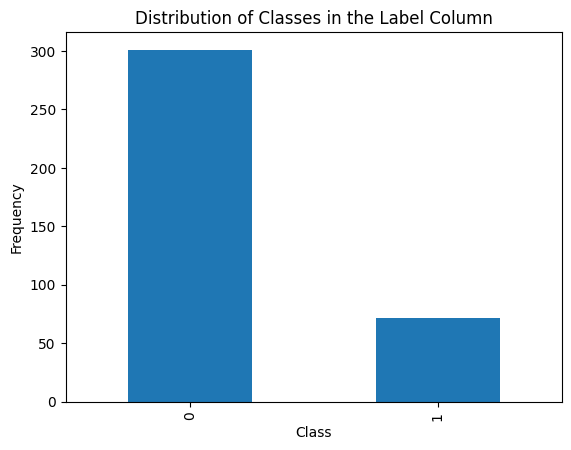

In [6]:
# Check for the distribution of classes in the label column
class_distribution = malware_data['Label'].value_counts()

print("\nDistribution of classes in the Label column:")
print(class_distribution)

# plot the distribution for a better visual understanding
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Distribution of Classes in the Label Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# SMOTE For balancing the data


Distribution of classes after applying SMOTE:
Label
1    301
0    301
Name: count, dtype: int64


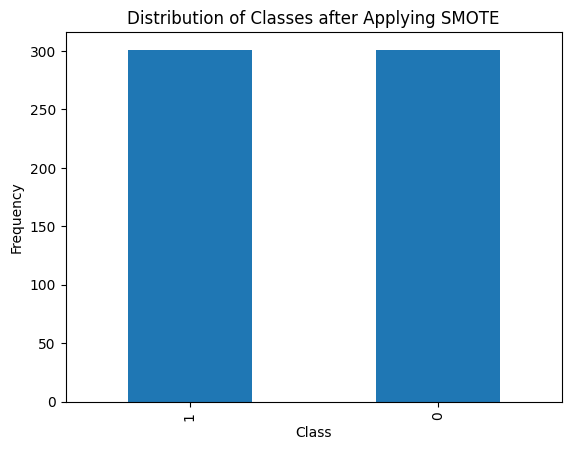

In [7]:
# Separate features and labels
X = malware_data.drop('Label', axis=1)
y = malware_data['Label']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of classes
resampled_class_distribution = pd.Series(y_resampled).value_counts()
print("\nDistribution of classes after applying SMOTE:")
print(resampled_class_distribution)

# Plot the new distribution
resampled_class_distribution.plot(kind='bar')
plt.title('Distribution of Classes after Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# 3. Feature Selection
- Selecting Relevant Features:
  - Apply feature selection techniques such as:
    - Feature importance from models (e.g., Random Forest)


Top 20 Feature ranking:
1. Feature 139 (0.06917079891068065)
2. Feature 20 (0.05818297914220522)
3. Feature 51 (0.056186046696364095)
4. Feature 19 (0.05336314729000359)
5. Feature 162 (0.03780496967574564)
6. Feature 67 (0.03725522017852733)
7. Feature 435 (0.02936035350992269)
8. Feature 179 (0.028435864992714825)
9. Feature 385 (0.02668082459068385)
10. Feature 66 (0.023654529352632986)
11. Feature 113 (0.02269834329257331)
12. Feature 530 (0.019596703035902316)
13. Feature 140 (0.019180915473335756)
14. Feature 30 (0.018574377957987546)
15. Feature 182 (0.017937822623770208)
16. Feature 320 (0.016126847342316675)
17. Feature 334 (0.01610311696402503)
18. Feature 49 (0.016018477233555272)
19. Feature 69 (0.014614620666462954)
20. Feature 26 (0.014388067484600763)


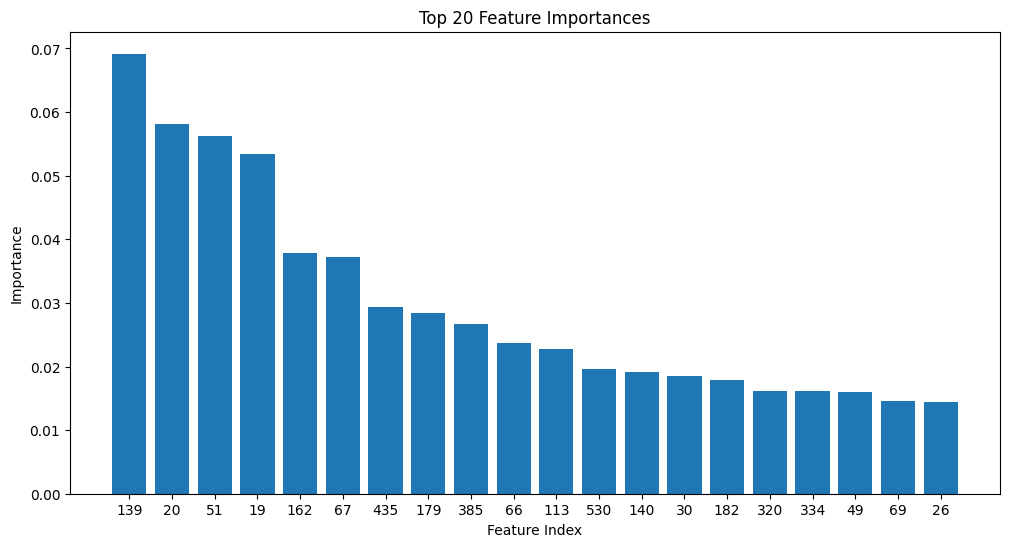


First few rows of the selected features in the training set:
     F_139  F_20  F_51  F_19  F_162  F_67  F_435  F_179  F_385  F_66  F_113  \
9        0     0     0     1      0     0      1      0      0     1      0   
375      0     0     0     1      0     0      1      1      0     1      1   
524      0     0     0     1      0     1      0      0      0     0      1   
188      1     1     1     0      1     1      1      1      1     0      0   
131      1     1     1     0      1     1      1      1      1     0      0   

     F_530  F_140  F_30  F_182  F_320  F_334  F_49  F_69  F_26  
9        0      1     0      0      0      0     0     1     1  
375      0      1     0      0      1      0     0     1     0  
524      0      1     1      0      0      0     0     0     1  
188      1      0     1      1      1      1     1     0     1  
131      1      0     1      1      1      1     1     0     1  


In [8]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Top 20 Feature ranking:")
for i in range(20):
    print(f"{i + 1}. Feature {indices[i] + 1} ({importances[indices[i]]})")

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), indices[:20] + 1)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Select the top 20 important features
selected_features = indices[:20]
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Display the first few rows of the selected features
print("\nFirst few rows of the selected features in the training set:")
print(X_train_selected.head())

# 4. Machine Learning Models Implementation
- Model Selection and Implementation:
  - Choose three models from the following: Decision Tree (DT), k-Nearest Neighbors (KNN), Random Forest (RF), Support Vector Machine (SVM), XGBoost (XGB), AdaBoost.
  - Implement these models using Python libraries like Scikit-learn.
  Use appropriate model parameters and hyperparameter tuning (e.g., GridSearchCV or RandomizedSearchCV).

In [9]:

# Model 1: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, scoring='accuracy', cv=5, verbose=1)
dt_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation score (accuracy) for Decision Tree:", dt_grid_search.best_score_)

# Use the best model to make predictions
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

# Evaluate the model performance on the test set
print("\nDecision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Precision:", precision_score(y_test, dt_predictions))
print("Recall:", recall_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_best_model.predict_proba(X_test)[:, 1]))

# Model 2: k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, scoring='accuracy', cv=5, verbose=1)
knn_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters for k-Nearest Neighbors:", knn_grid_search.best_params_)
print("Best cross-validation score (accuracy) for k-Nearest Neighbors:", knn_grid_search.best_score_)

# Use the best model to make predictions
knn_best_model = knn_grid_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)

# Evaluate the model performance on the test set
print("\nk-Nearest Neighbors Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, knn_best_model.predict_proba(X_test)[:, 1]))

# Model 3: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score (accuracy) for Random Forest:", rf_grid_search.best_score_)

# Use the best model to make predictions
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Evaluate the model performance on the test set
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score (accuracy) for Decision Tree: 0.9979166666666668

Decision Tree Classifier Performance:
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters for k-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score (accuracy) for k-Nearest Neighbors: 1.0

k-Nearest Neighbors Classifier Performance:
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_s

# 5. Model Evaluation:
 - Evaluate each model using 5-fold Cross Validation on the following performance
metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC-AUC Score
 - Use cross-validation to ensure the reliability of your results.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the list of models and their best estimators
models = {
    'Decision Tree': dt_best_model,
    'k-Nearest Neighbors': knn_best_model,
    'Random Forest': rf_best_model
}

# Define a function to calculate evaluation metrics including ROC-AUC
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model using a separate test set approach
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name} Model...")

    # Evaluate the model
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Store the evaluation results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC Score': roc_auc
    }

    # Print the evaluation results for the model
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)

# Print the final evaluation results
print("\nFinal Evaluation Results:")
for model_name, scores in evaluation_results.items():
    print(f"\n{model_name} Model:")
    print("Accuracy:", scores['Accuracy'])
    print("Precision:", scores['Precision'])
    print("Recall:", scores['Recall'])
    print("F1 Score:", scores['F1 Score'])
    print("ROC-AUC Score:", scores['ROC-AUC Score'])



Evaluating Decision Tree Model...
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424

Evaluating k-Nearest Neighbors Model...
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424

Evaluating Random Forest Model...
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9910468319559228

Final Evaluation Results:

Decision Tree Model:
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424

k-Nearest Neighbors Model:
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.9924242424242424

Random Forest Model:
Accuracy: 0.9917355371900827
Precision: 0.9821428571428571
Recall: 1.0
F1 Score: 0.9909909909909909
ROC-AUC Score: 0.991

# 6. Comparison and Analysis
- Comparative Analysis:
  - Compare the models based on their performance metrics.
  - Discuss the strengths and weaknesses of each model in the context of malware detection.
  - Provide insights into the challenges faced while applying machine learning to cybersecurity.

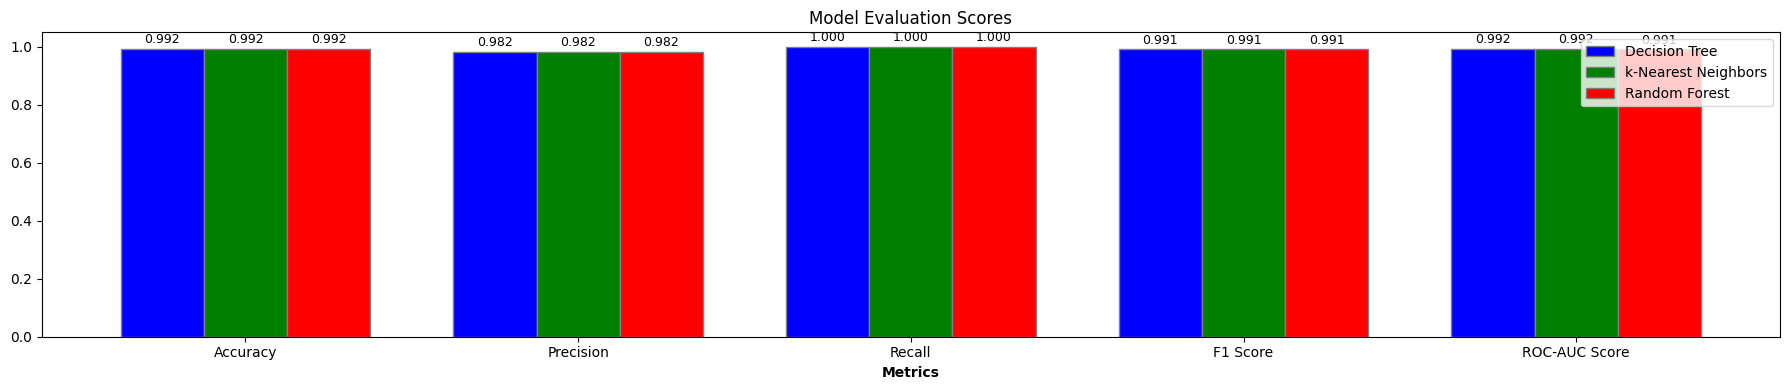

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']
decision_tree_scores = [0.9917355371900827, 0.9821428571428571, 1.0, 0.9909909909909909, 0.9924242424242424]
knn_scores = [0.9917355371900827, 0.9821428571428571, 1.0, 0.9909909909909909, 0.9924242424242424]
random_forest_scores = [0.9917355371900827, 0.9821428571428571, 1.0, 0.9909909909909909, 0.9910468319559228]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and axes
plt.figure(figsize=(18, 4))

# Plot bars
plt.bar(r1, decision_tree_scores, color='b', width=bar_width, edgecolor='grey', label='Decision Tree')
plt.bar(r2, knn_scores, color='g', width=bar_width, edgecolor='grey', label='k-Nearest Neighbors')
plt.bar(r3, random_forest_scores, color='r', width=bar_width, edgecolor='grey', label='Random Forest')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics))], metrics)

# Create legend & title
plt.title('Model Evaluation Scores')
plt.legend()

# Add labels above each bar
for i in range(len(metrics)):
    plt.text(r1[i], decision_tree_scores[i] + 0.01, f'{decision_tree_scores[i]:.3f}', ha='center', va='bottom', color='black', fontsize=9)
    plt.text(r2[i], knn_scores[i] + 0.01, f'{knn_scores[i]:.3f}', ha='center', va='bottom', color='black', fontsize=9)
    plt.text(r3[i], random_forest_scores[i] + 0.01, f'{random_forest_scores[i]:.3f}', ha='center', va='bottom', color='black', fontsize=9)

# Show graphic
plt.tight_layout()
plt.show()